Tujuan : Mengklasifikasikan minuman berdasarkan skor Nutri-Score. Nutri-Score adalah sistem label nutrisi yang mengklasifikasikan minuman dari A (terbaik) ke E (terburuk) berdasarkan nilai nutrisi per 100 ml, seperti kandungan energi, lemak, gula, garam, serat, dan protein.


**Dataset**
---

Pengumpulan data berdasarkan scraping dari situs Open Food Facts



In [70]:
import pandas as pd

url = "https://raw.githubusercontent.com/nabhylanr/ML-NutriScore/main/minuman.csv"
df = pd.read_csv(url)

df.head()

,Kategori,Nama_minuman,Nutri_Score,Energy (Per 100 ml),Fat (Per 100 ml),Saturated fat (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Fiber (Per 100 ml),Proteins (Per 100 ml),Salt (Per 100 ml)
0,fruit-juices,Cappy pulpy,e,155.0,0.0,0.0,9.0,7.0,NaN,0.0,0.050000
1,fruit-juices,PRESSup,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.000003
2,fruit-juices,Press up,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.002500
3,fruit-juices,Shot de gingembre bio,c,142.0,0.5,0.1,7.9,7.6,0.0,0.5,0.010000
4,fruit-juices,Jutos,d,66.8,0.0,0.0,10.0,8.0,0.0,0.0,0.050000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kategori                    811 non-null    object 
 1   Nama_minuman                800 non-null    object 
 2   Nutri_Score                 811 non-null    object 
 3   Energy (Per 100 ml)         811 non-null    float64
 4   Fat (Per 100 ml)            811 non-null    float64
 5   Saturated fat (Per 100 ml)  776 non-null    float64
 6   Carbohydrates (Per 100 ml)  810 non-null    float64
 7   Sugars (Per 100 ml)         803 non-null    float64
 8   Fiber (Per 100 ml)          510 non-null    float64
 9   Proteins (Per 100 ml)       811 non-null    float64
 10  Salt (Per 100 ml)           811 non-null    float64
dtypes: float64(8), object(3)
memory usage: 69.8+ KB


**Data Preprocessing**
---

Missing Value
---

In [72]:
misval_cek = {
    'Missing Values':df.isnull().sum(),
    'Missing Values (%)': ((df.isnull().sum()/df.shape[0]).round(2)*100),
    'Data Type': df.dtypes
    }

misval=pd.DataFrame(misval_cek)
misval

,Missing Values,Missing Values (%),Data Type
Kategori,0,0.0,object
Nama_minuman,11,1.0,object
Nutri_Score,0,0.0,object
Energy (Per 100 ml),0,0.0,float64
Fat (Per 100 ml),0,0.0,float64
Saturated fat (Per 100 ml),35,4.0,float64
Carbohydrates (Per 100 ml),1,0.0,float64
Sugars (Per 100 ml),8,1.0,float64
Fiber (Per 100 ml),301,37.0,float64
Proteins (Per 100 ml),0,0.0,float64


In [73]:
kolom_fitur = ['Energy (Per 100 ml)', 'Fat (Per 100 ml)',
               'Saturated fat (Per 100 ml)', 'Carbohydrates (Per 100 ml)',
               'Sugars (Per 100 ml)', 'Fiber (Per 100 ml)',
               'Proteins (Per 100 ml)', 'Salt (Per 100 ml)']

for kolom in kolom_fitur:
  if df[kolom].isnull().any():
    median_val = df[kolom].median()
    df[kolom] = df[kolom].fillna(median_val)

In [74]:
misval_cek = {
    'Missing Values': df.isnull().sum(),
    'Missing Values (%)': ((df.isnull().sum() / df.shape[0]).round(2) * 100),
    'Data Type': df.dtypes
}

misval = pd.DataFrame(misval_cek)
misval

,Missing Values,Missing Values (%),Data Type
Kategori,0,0.0,object
Nama_minuman,11,1.0,object
Nutri_Score,0,0.0,object
Energy (Per 100 ml),0,0.0,float64
Fat (Per 100 ml),0,0.0,float64
Saturated fat (Per 100 ml),0,0.0,float64
Carbohydrates (Per 100 ml),0,0.0,float64
Sugars (Per 100 ml),0,0.0,float64
Fiber (Per 100 ml),0,0.0,float64
Proteins (Per 100 ml),0,0.0,float64


Label Encoding
---

In [76]:
from sklearn.preprocessing import LabelEncoder

y = df['Nutri_Score']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [77]:
for label, class_ in enumerate(le.classes_):
    print(f"Class {label}: {class_}")

Class 0: b
Class 1: c
Class 2: d
Class 3: e


Scalling Data
---

In [78]:
from sklearn.preprocessing import StandardScaler

X = df[kolom_fitur]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

Splitting Data
---

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [80]:
print("X_train (data latih fitur):", X_train.shape)
print("X_test (data uji fitur):", X_test.shape)
print("y_train (data latih target):", y_train.shape)
print("y_test (data uji target):", y_test.shape)

X_train (data latih fitur): (648, 8)
X_test (data uji fitur): (163, 8)
y_train (data latih target): (648,)
y_test (data uji target): (163,)


**Training Model**
---

Decision Tree
---
Nabhyla Niagara (5025221286)


In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

dtc_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=17)
dtc_model.fit(X_train, y_train)

# predict
y_pred_dtc = dtc_model.predict(X_test)

# accuracy
accuracy = round(accuracy_score(y_test, y_pred_dtc), 4) * 100
print(f"Akurasi Model: {accuracy}%")

Akurasi Model: 76.07000000000001%


In [82]:
# max depth optimal
for i in [11,13,15,17,19]:
    check = DecisionTreeClassifier(criterion='gini',random_state=42, max_depth=i)
    check.fit(X_train, y_train)
    y_pred_check= check.predict(X_test)
    print(f"Akurasi max depth {i} = {accuracy_score(y_test,y_pred_check)}")

Akurasi max depth 11 = 0.7116564417177914
Akurasi max depth 13 = 0.7361963190184049
Akurasi max depth 15 = 0.7484662576687117
Akurasi max depth 17 = 0.7607361963190185
Akurasi max depth 19 = 0.7607361963190185


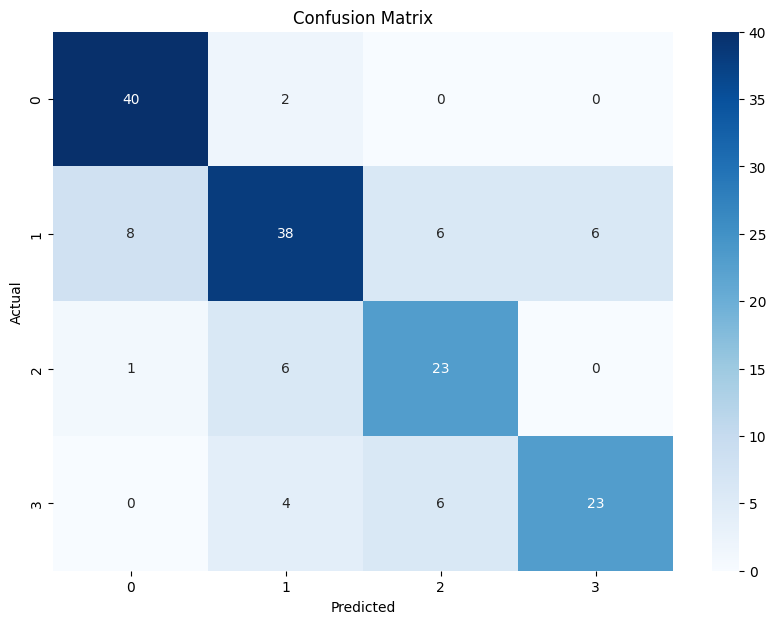

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_dtc)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [84]:
accuracy = accuracy_score(y_test, y_pred_dtc)
precision = precision_score(y_test, y_pred_dtc, average='macro')
recall = recall_score(y_test, y_pred_dtc, average='macro')
f1 = f1_score(y_test, y_pred_dtc, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7607361963190185
Precision: 0.7566432090077411
Recall: 0.7677974324526049
F1-Score: 0.7581


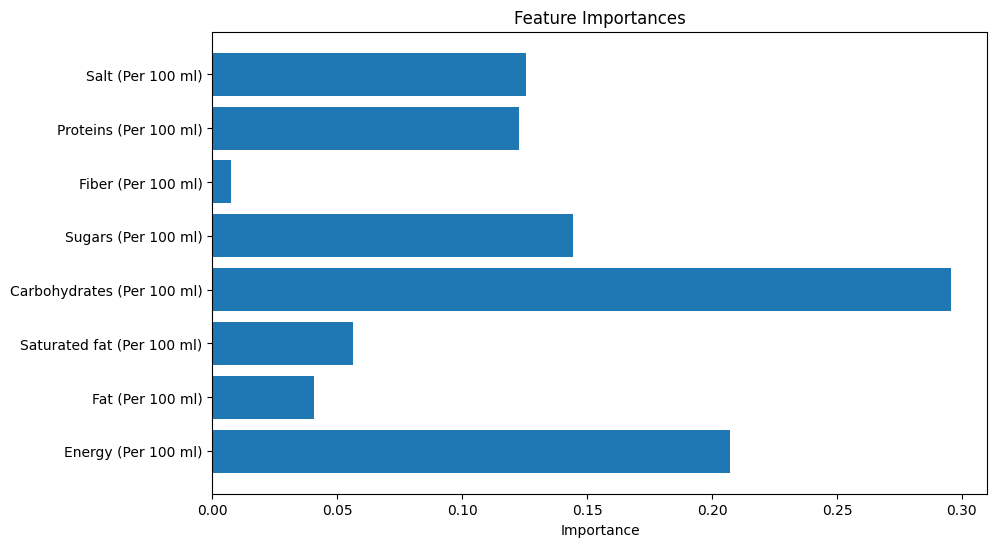

In [85]:
feature_importances = dtc_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

KNN
---

Rumaisha Afrina

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

k_initial = 1

knn_model = KNeighborsClassifier(n_neighbors = k_initial)

knn_model.fit(X_train, y_train)

# predict
y_pred_knn = knn_model.predict(X_test)

# accuracy
accuracy = round(accuracy_score(y_test, y_pred_knn), 4) * 100

print(f"Akurasi Model: {accuracy}%")

cm = confusion_matrix(y_test, y_pred_knn)

Akurasi Model: 80.97999999999999%


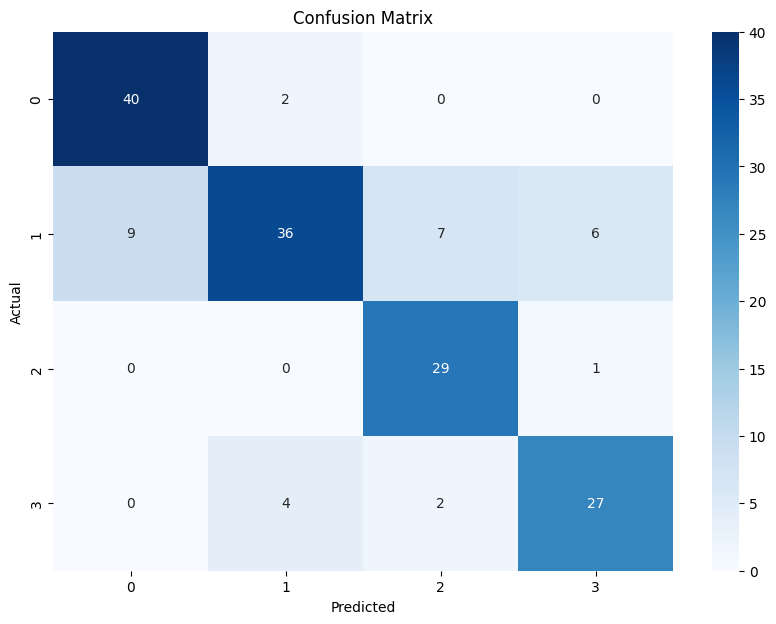

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [124]:
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')
f1 = f1_score(y_test, y_pred_knn, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8098159509202454
Precision: 0.8076862323876919
Recall: 0.8394797731004628
F1-Score: 0.8145


Random Forest
---

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

rf_model = RandomForestClassifier(criterion='gini', random_state=42, max_depth=19)
rf_model.fit(X_train, y_train)

# predict
y_pred_rf = rf_model.predict(X_test)

# accuracy
accuracy = round(accuracy_score(y_test, y_pred_rf), 4) * 100
print(f"Akurasi Model: {accuracy}%")

Akurasi Model: 84.66%


In [131]:
for i in [13,15,17,19,21,23,25,27]:
    check = RandomForestClassifier(criterion='gini',random_state=42, max_depth=i)
    check.fit(X_train, y_train)
    y_pred_check= check.predict(X_test)
    print(f"Akurasi max depth {i} = {accuracy_score(y_test,y_pred_check)}")

Akurasi max depth 13 = 0.8282208588957055
Akurasi max depth 15 = 0.8343558282208589
Akurasi max depth 17 = 0.8404907975460123
Akurasi max depth 19 = 0.8466257668711656
Akurasi max depth 21 = 0.8282208588957055
Akurasi max depth 23 = 0.8343558282208589
Akurasi max depth 25 = 0.8343558282208589
Akurasi max depth 27 = 0.8343558282208589


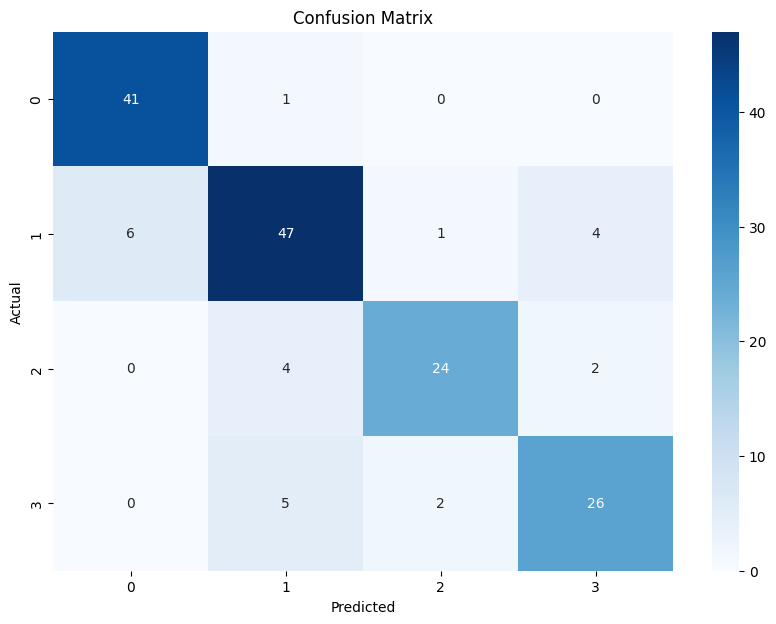

In [132]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [133]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8466257668711656
Precision: 0.8495726794823939
Recall: 0.8436035229138679
F1-Score: 0.8452


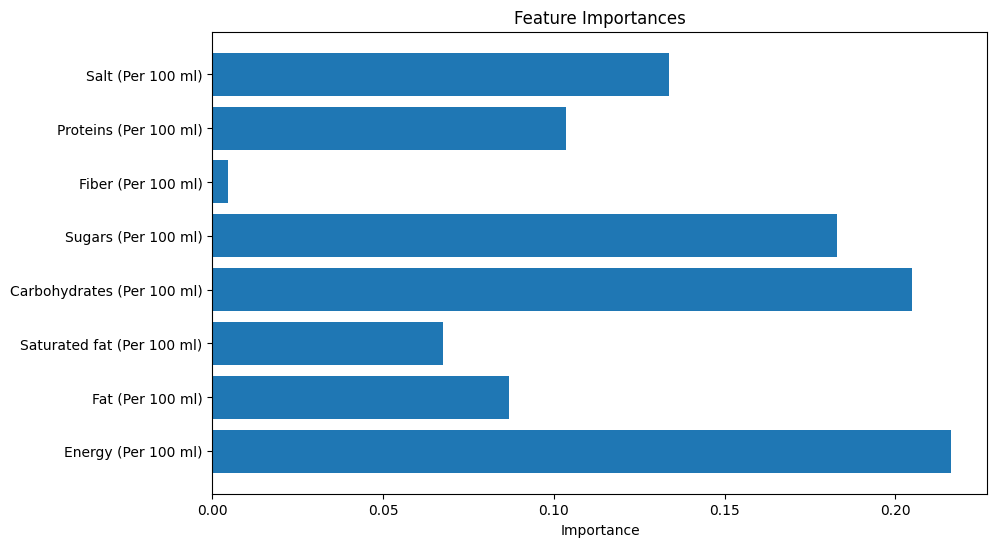

In [134]:
feature_importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

XGBoost
---

In [125]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

xgb_model = XGBClassifier(random_state=42, max_depth=11)
xgb_model.fit(X_train, y_train)

# predict
y_pred_xgb = xgb_model.predict(X_test)

# accuracy
accuracy = round(accuracy_score(y_test, y_pred_xgb), 4) * 100
print(f"Akurasi Model: {accuracy}%")

Akurasi Model: 84.66%


In [126]:
for i in [7,9,11,13,15]:
    check = XGBClassifier(random_state=42, max_depth=i)
    check.fit(X_train, y_train)
    y_pred_check= check.predict(X_test)
    print(f"Akurasi max depth {i} = {accuracy_score(y_test,y_pred_check)}")

Akurasi max depth 7 = 0.8343558282208589
Akurasi max depth 9 = 0.8404907975460123
Akurasi max depth 11 = 0.8466257668711656
Akurasi max depth 13 = 0.8343558282208589
Akurasi max depth 15 = 0.8404907975460123


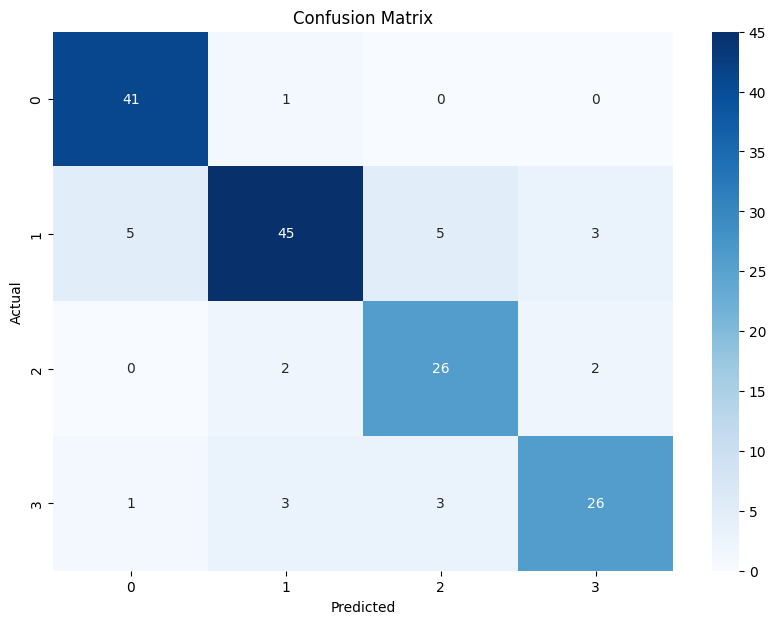

In [127]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [128]:
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='macro')
recall = recall_score(y_test, y_pred_xgb, average='macro')
f1 = f1_score(y_test, y_pred_xgb, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8466257668711656
Precision: 0.8395272316201704
Recall: 0.8516494999253621
F1-Score: 0.8430


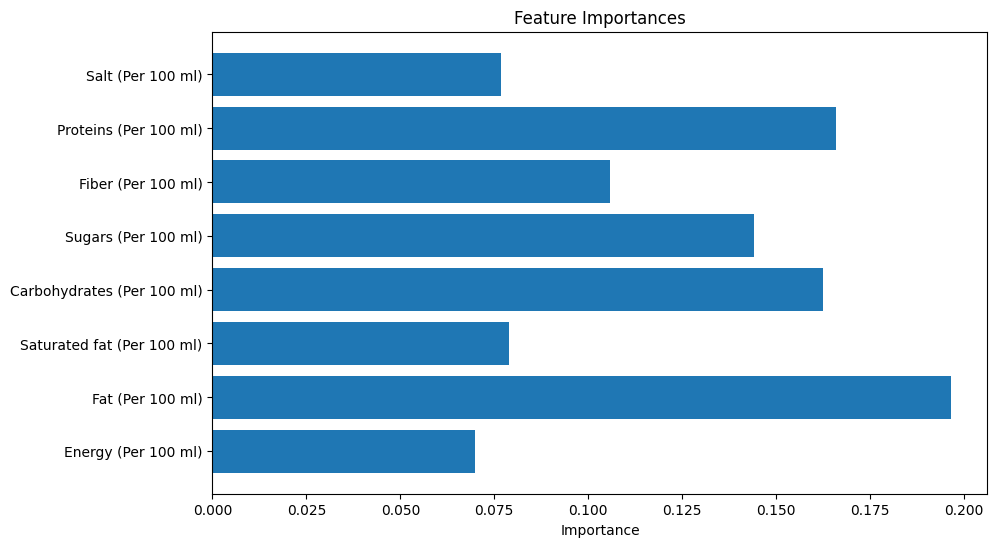

In [129]:
feature_importances = xgb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Logistic Regression
---

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

logreg_model = LogisticRegression(C=5, random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

# predict
y_pred_logreg = logreg_model.predict(X_test)

# accuracy
accuracy = round(accuracy_score(y_test, y_pred_logreg), 4) * 100
print(f"Akurasi Model: {accuracy}%")

Akurasi Model: 65.64%


In [111]:
for c in [1,3,5,7,9]:
    model = LogisticRegression(C=c, random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Akurasi C={c} = {acc}")

Akurasi C=1 = 0.6441717791411042
Akurasi C=3 = 0.6441717791411042
Akurasi C=5 = 0.656441717791411
Akurasi C=7 = 0.656441717791411
Akurasi C=9 = 0.656441717791411


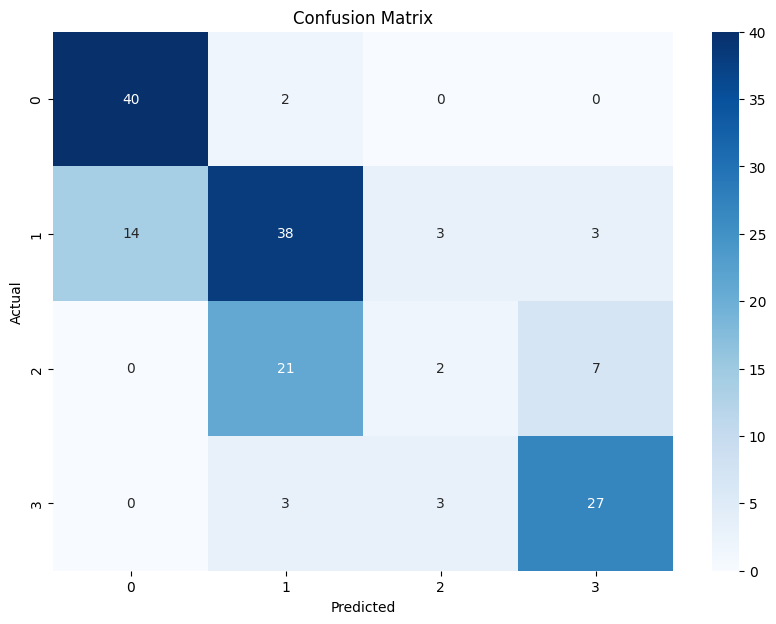

In [114]:
cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [115]:
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg, average='macro')
recall = recall_score(y_test, y_pred_logreg, average='macro')
f1 = f1_score(y_test, y_pred_logreg, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.656441717791411
Precision: 0.5785551176176176
Recall: 0.6231004627556351
F1-Score: 0.5832
